In [10]:
import pickle
import matplotlib.pyplot as plt

with open('data/dataset.pkl', "rb") as file:
    dataset = pickle.load(file)
    

{'folder': 'images', 'filename': 'Cars95.png', 'size': {'width': '600', 'height': '400', 'depth': '3'}, 'objects': [{'difficult': False, 'bndbox': {'xmin': '278', 'ymin': '182', 'xmax': '407', 'ymax': '263'}}]}
{'folder': 'images', 'filename': 'Cars94.png', 'size': {'width': '400', 'height': '319', 'depth': '3'}, 'objects': [{'difficult': False, 'bndbox': {'xmin': '176', 'ymin': '210', 'xmax': '251', 'ymax': '248'}}]}
{'folder': 'images', 'filename': 'Cars408.png', 'size': {'width': '400', 'height': '267', 'depth': '3'}, 'objects': [{'difficult': False, 'bndbox': {'xmin': '160', 'ymin': '217', 'xmax': '187', 'ymax': '228'}}]}
{'folder': 'images', 'filename': 'Cars151.png', 'size': {'width': '400', 'height': '242', 'depth': '3'}, 'objects': [{'difficult': False, 'bndbox': {'xmin': '54', 'ymin': '135', 'xmax': '120', 'ymax': '178'}}]}


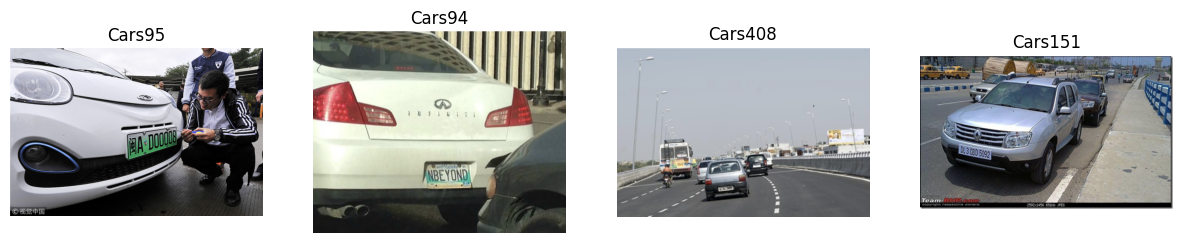

In [11]:
import random

random_keys = random.sample(list(dataset.keys()), 4)
_, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, key in enumerate(random_keys):
    image = dataset[key]["image"] 
    print(dataset[key]["annotation"])
    axs[i].imshow(image)
    axs[i].axis('off') 
    axs[i].set_title(key)

plt.show()